<a href="https://colab.research.google.com/github/surajkonline/R-D-AIML-workshop/blob/main/Auot_MPG_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing numpy, pandas & matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# Reading the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/surajkonline/R-D-AIML-workshop/surajkonline-Regression_auto_mpg/auto-mpg.csv') 

In [23]:
# Removing "?" from horsepower & converting it from object to numeric
df = df.drop(df[df.horsepower =="?"].index)
df['horsepower']=pd.to_numeric(df['horsepower'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [25]:
# Dropping car name as we don't intend it to keep in the model
df.drop(['car name','origin', 'model year'],axis=1, inplace=True)

In [26]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


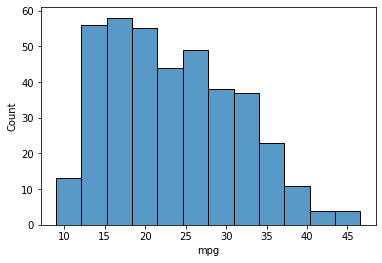

In [27]:
sns.histplot(data=df, x="mpg");

In [28]:
# Converting mpg into three categories "Low", "Medium" & "high"
df['mpg'] = pd.qcut(df['mpg'], 3, labels=["Low", "Medium", "High"])

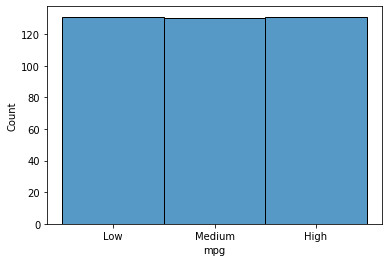

In [29]:
# Checking the mpg distribution
sns.histplot(data=df, x="mpg");

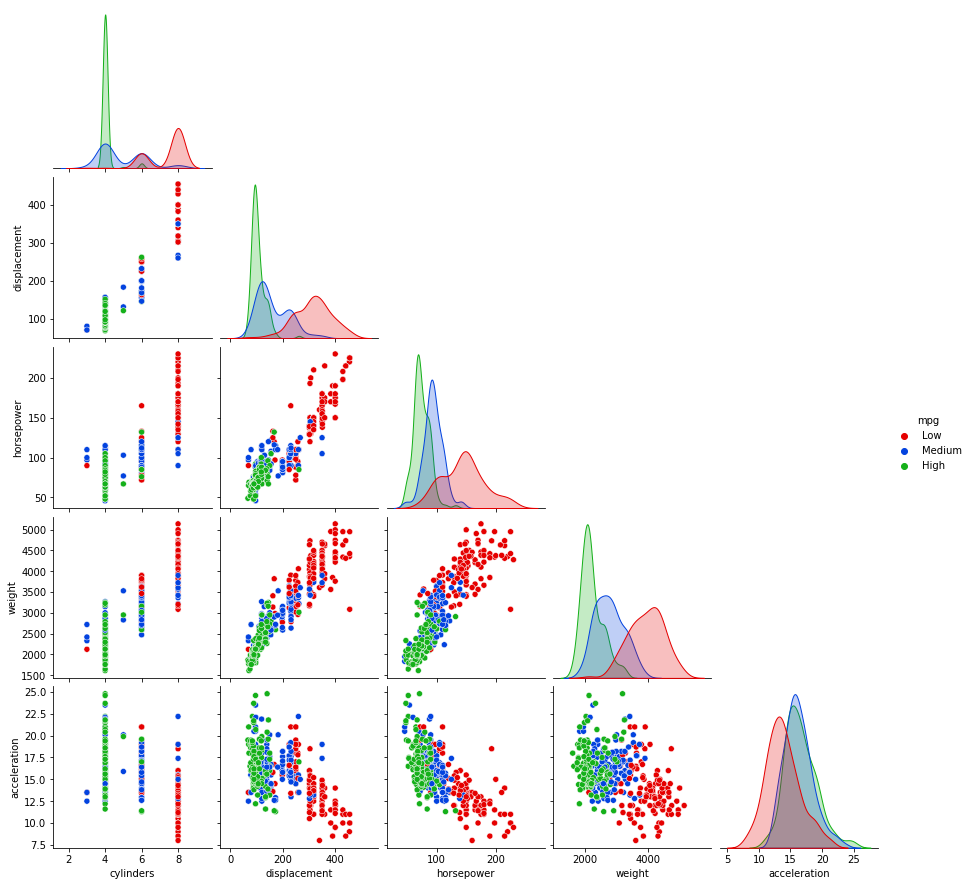

In [ ]:
colors = ['red', 'blue', 'green']
sns.pairplot(df,palette=sns.xkcd_palette(colors),hue= "mpg", corner=True)
plt.show()

In [ ]:
# Naming columns
col_names = ['cylinders',	'displacement',	'horsepower','weight',	'acceleration']
col_names

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [30]:
#X = df.drop(['mpg'], axis=1)
X=df[col_names]
y = df['mpg']

In [32]:
X

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5
...,...,...,...,...,...
393,4,140.0,86,2790,15.6
394,4,97.0,52,2130,24.6
395,4,135.0,84,2295,11.6
396,4,120.0,79,2625,18.6


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix # Model validation score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

In [34]:
# For stratifid splitting of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test

In [57]:
# Fitting the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [58]:
#predicting on test dataset
y_pred_test = clf.predict(X_test)
y_pred_train= clf.predict(X_train)

In [59]:
# Model performance 
print ('\033[1m''Accuracy Score of Training data is:',accuracy_score(y_train, y_pred_train))
print('\033[1m''Accuracy Score of Test data is:',accuracy_score(y_test, y_pred_test))
print('Classification report is: \n',classification_report(y_test, y_pred_test))
pd.crosstab(y_test, y_pred_test, rownames= ['True'],colnames=['Predicted'], margins=True)

Accuracy Score of Training data is: 0.7846715328467153
Accuracy Score of Test data is: 0.788135593220339
Classification report is: 
               precision    recall  f1-score   support

        High       0.90      0.69      0.78        39
         Low       0.92      0.82      0.87        40
      Medium       0.63      0.85      0.73        39

    accuracy                           0.79       118
   macro avg       0.82      0.79      0.79       118
weighted avg       0.82      0.79      0.79       118



Predicted,High,Low,Medium,All
True,,,,
Low,0,33,7,40
Medium,3,3,33,39
High,27,0,12,39
All,30,36,52,118


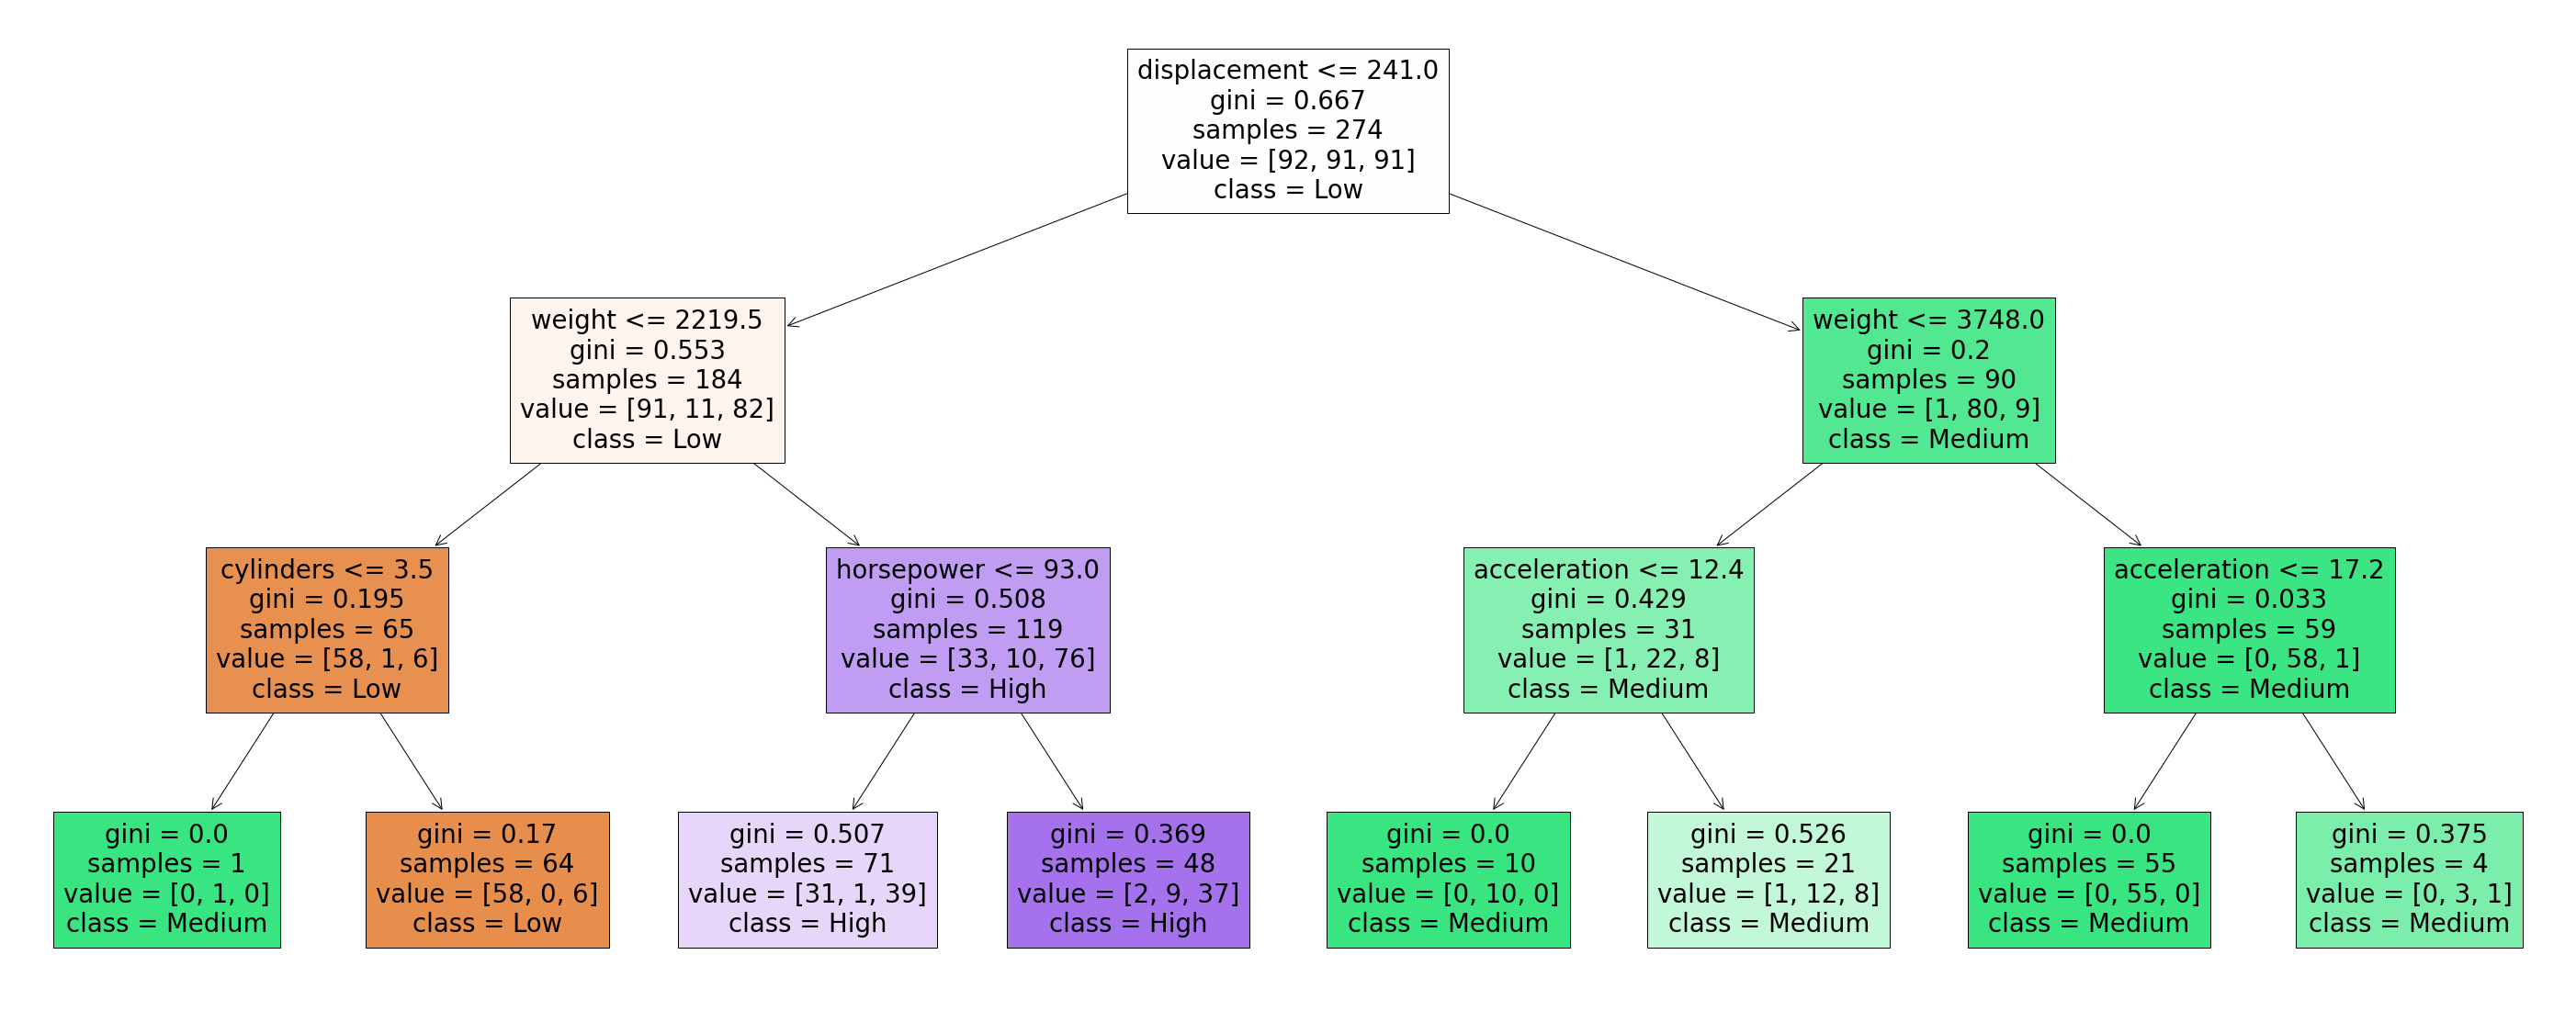

In [60]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(clf,
feature_names=col_names,class_names=["Low","Medium", "High"],
filled=True)


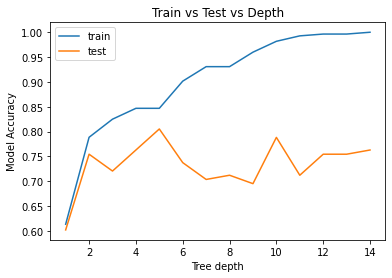

,train,test
1,0.613139,0.601695
2,0.788321,0.754237
3,0.824818,0.720339
4,0.846715,0.762712
5,0.846715,0.805085
6,0.901460,0.737288
7,0.930657,0.703390
8,0.930657,0.711864
9,0.959854,0.694915
10,0.981752,0.788136


In [ ]:
j=1
train=[]
test=[]
while j<15:
  X_train, X_test, y_train,y_test= train_test_split(X,y, stratify=y, test_size=0.3)
  model= DecisionTreeClassifier(max_depth=j)
  model.fit(X_train, y_train)
  RF_training_labels= model.predict(X_train)
  RF_testing_labels= model.predict (X_test)
  train.append(accuracy_score(y_train, RF_training_labels))
  test.append(accuracy_score(y_test, RF_testing_labels))
  j= j+1
  accuracy_frame= pd.DataFrame ({"train": train, "test": test})
  accuracy_frame.index= np.arange (1, len(accuracy_frame)+1)
(accuracy_frame,accuracy_frame.plot.line(title= "Train vs Test vs Depth"))
plt.ylabel('Model Accuracy')
plt.xlabel('Tree depth')
plt.show()
accuracy_frame

In [61]:
# To see Decision tree in text form ##
from sklearn.tree import export_text
r = export_text(clf, feature_names=col_names)
print(r)

|--- displacement <= 241.00
|   |--- weight <= 2219.50
|   |   |--- cylinders <= 3.50
|   |   |   |--- class: Low
|   |   |--- cylinders >  3.50
|   |   |   |--- class: High
|   |--- weight >  2219.50
|   |   |--- horsepower <= 93.00
|   |   |   |--- class: Medium
|   |   |--- horsepower >  93.00
|   |   |   |--- class: Medium
|--- displacement >  241.00
|   |--- weight <= 3748.00
|   |   |--- acceleration <= 12.40
|   |   |   |--- class: Low
|   |   |--- acceleration >  12.40
|   |   |   |--- class: Low
|   |--- weight >  3748.00
|   |   |--- acceleration <= 17.20
|   |   |   |--- class: Low
|   |   |--- acceleration >  17.20
|   |   |   |--- class: Low

